In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
pd.set_option("display.max_columns",None)

In [2]:
train_df = pd.read_excel(r"C:\Users\SAGAR KESHAVE\Git_ML_Proj\Machine Learning Projects\Regression\Flight_Fare_Prediction\2_Data\Data_Train.xlsx")
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## EDA

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


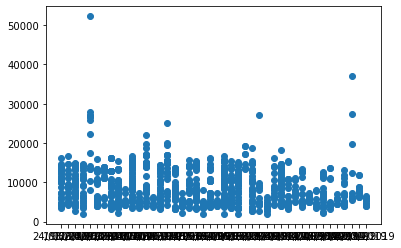

In [4]:
fig, ax = plt.subplots()
ax.scatter(train_df.Date_of_Journey[:1000], train_df.Price[:1000])

<AxesSubplot:>

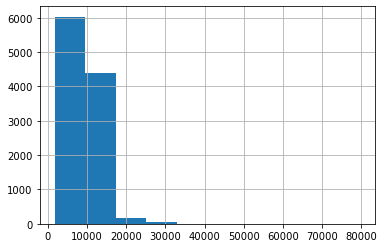

In [5]:
train_df.Price.hist()

In [6]:
train_df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [7]:
for i in ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']:
   
    print(f"\nUnique values in {i} are  {train_df[i].unique()}")


Unique values in Airline are  ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']

Unique values in Source are  ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']

Unique values in Destination are  ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']

Unique values in Total_Stops are  ['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']

Unique values in Additional_Info are  ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


In [8]:
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_df.dropna(inplace=True)

In [10]:
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
# No missing values now


In [12]:
train_df.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

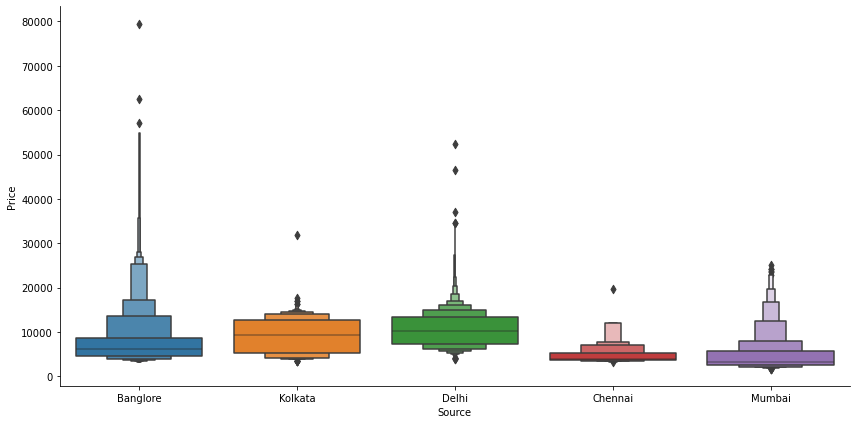

In [13]:
sns.catplot(y='Price', x='Source', data=train_df, kind="boxen", height=6, aspect=2)


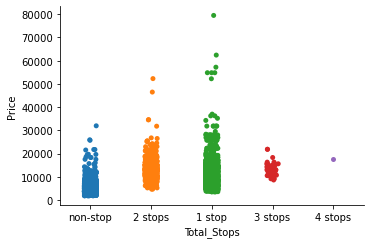

In [14]:
sns.catplot(y = 'Price', x='Total_Stops',data=train_df, height=3.5, aspect=1.5)

>* Only one with 4 stops and some outliers

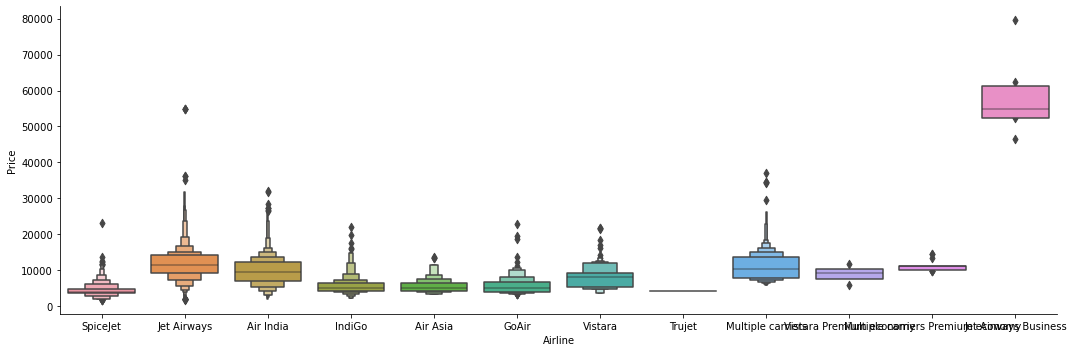

In [15]:
sns.catplot(y="Price", x='Airline',data=train_df.sort_values("Price", ), kind='boxen', height=5, aspect=3)

>* Jet_Airways Business with higher prices.

In [16]:
train_df.Additional_Info.value_counts()/len(train_df)

No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: Additional_Info, dtype: float64

In [17]:
# 80% data points with no info in col so better to remove

### Feature Engineering

    Drop Additional info and route columns
    droping Route beause it is similar to total_stops add its easier to deal with numbers


In [18]:
train_df.drop(["Route", "Additional_Info"], axis=1, inplace=True)

In [19]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


### Extract features new features
day and month from Date_of_Journey

In [20]:
train_df["Journey_Day"] = pd.to_datetime(train_df.Date_of_Journey,format="%d/%m/%Y").dt.day
train_df["Journey_Month"] = pd.to_datetime(train_df.Date_of_Journey, format="%d/%m/%Y").dt.month

In [21]:
train_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3
5,SpiceJet,24/06/2019,Kolkata,Banglore,09:00,11:25,2h 25m,non-stop,3873,24,6
6,Jet Airways,12/03/2019,Banglore,New Delhi,18:55,10:25 13 Mar,15h 30m,1 stop,11087,12,3
7,Jet Airways,01/03/2019,Banglore,New Delhi,08:00,05:05 02 Mar,21h 5m,1 stop,22270,1,3
8,Jet Airways,12/03/2019,Banglore,New Delhi,08:55,10:25 13 Mar,25h 30m,1 stop,11087,12,3
9,Multiple carriers,27/05/2019,Delhi,Cochin,11:25,19:15,7h 50m,1 stop,8625,27,5


    departure hour and minutes from dep_time

In [22]:
train_df["Dep_Hour"]= pd.to_datetime(train_df.Dep_Time).dt.hour
train_df["Dep_Min"] = pd.to_datetime(train_df.Dep_Time).dt.minute

    Arrival hour and minutes

In [23]:
train_df["Arrival_Hour"] = pd.to_datetime(train_df.Arrival_Time).dt.hour
train_df["Arrival_Min"] = pd.to_datetime(train_df.Arrival_Time).dt.minute

    Now drop columns from which we extrated features from

In [24]:
train_df.drop(['Dep_Time', 'Arrival_Time', 'Date_of_Journey'], axis=1, inplace=True)

### Convert Duration into hours and minutes

In [25]:
duration = list(train_df.Duration)
duration[:5]


['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m']

In [26]:
duration[0].split()

['2h', '50m']

In [27]:
duration[0].strip() + "0h"

'2h 50m0h'

In [28]:
for i in range(len(duration)):
    if len(duration[i].split()) !=2:  # Check if it has only minutes or hours
         if 'h' in duration[i]:
                duration[i] = duration[i].strip() + ' 0m'  # add minutes
         else:
                duration[i] ="0h " + duration[i]   # add hours
                
                

In [29]:
duration[:5]

['2h 50m', '7h 25m', '19h 0m', '5h 25m', '4h 45m']

In [30]:
# print only hour value
print(duration[0].split(sep='h')[0])

2


In [31]:
# print only minutes value
duration[0].split(sep='m')[0].split()[-1]

'50'

In [32]:
# create hour and minutes list'

duration_hour=[]
duration_min =[]
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0]))
    duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [33]:
print(duration_hour[:5])
print(duration_min[:5])

[2, 7, 19, 5, 4]
[50, 25, 0, 25, 45]


### add new columns to traindf

In [34]:
train_df["Duration_Hours"] = duration_hour
train_df["Duration_Min"] = duration_min

In [35]:
# Now we extracted info from duration so drop that column
train_df.drop(['Duration'], axis=1, inplace=True)

In [36]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue">**Nominal data** </span>--> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [37]:
# get all categorical features
for label, content in train_df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Airline
Source
Destination
Total_Stops


### Airline, source and destination are nominal type data so One hot encode them

In [38]:
#  use double brackets to get dataframe
Airline = train_df[['Airline']]
Airline.head()

,Airline
0,IndiGo
1,Air India
2,Jet Airways
3,IndiGo
4,IndiGo


In [39]:
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [40]:
# For source 
Source = train_df[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [41]:
Destination = train_df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


### Total stops is ordinal data so Label encoding

In [42]:
train_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [43]:
train_set = pd.concat([train_df, Airline, Source, Destination], axis = 1)

In [44]:
train_set.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
train_set.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [46]:
train_set

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


### Feature Selection

In [47]:
## Splitting data into x and y

In [48]:
X = train_set.drop("Price", axis= 1)
y = train_set.Price

In [51]:
X.shape, len(y)

((10682, 29), 10682)

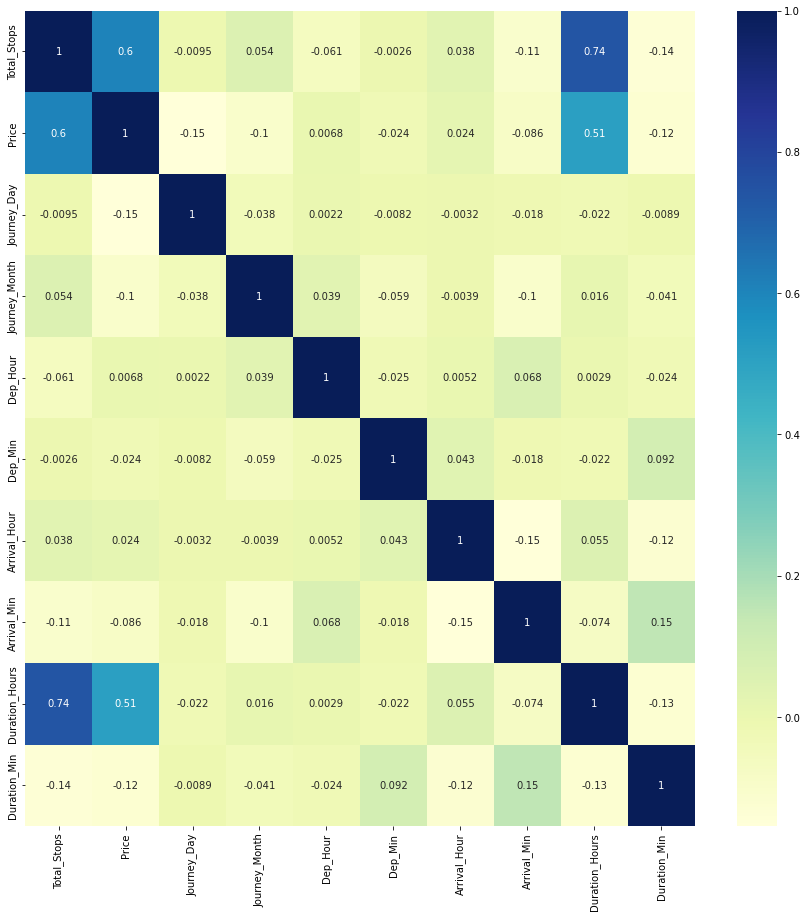

In [52]:
plt.figure(figsize= (15,15))
sns.heatmap(train_df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [53]:
## This shows that no feature is highly co-related so no chance of duplicasy

In [54]:
### Feature importance

In [55]:
from sklearn.ensemble import ExtraTreesRegressor
selector = ExtraTreesRegressor()

selector.fit(X,y)

ExtraTreesRegressor()

In [56]:
selector.feature_importances_

array([2.29751612e-01, 1.44565195e-01, 5.28258862e-02, 2.40388491e-02,
       2.11312856e-02, 2.75874783e-02, 1.88923947e-02, 1.23987816e-01,
       1.82117254e-02, 9.96884362e-03, 2.10892202e-03, 1.96319233e-02,
       1.33830696e-01, 6.71260881e-02, 1.80198671e-02, 8.63964800e-04,
       3.20281276e-03, 1.13215461e-04, 4.92934244e-03, 8.11294457e-05,
       4.28294839e-04, 1.38587342e-02, 3.73971767e-03, 5.31108740e-03,
       9.82821072e-03, 1.30445439e-02, 7.94199653e-03, 4.96876039e-04,
       2.44814911e-02])

<AxesSubplot:>

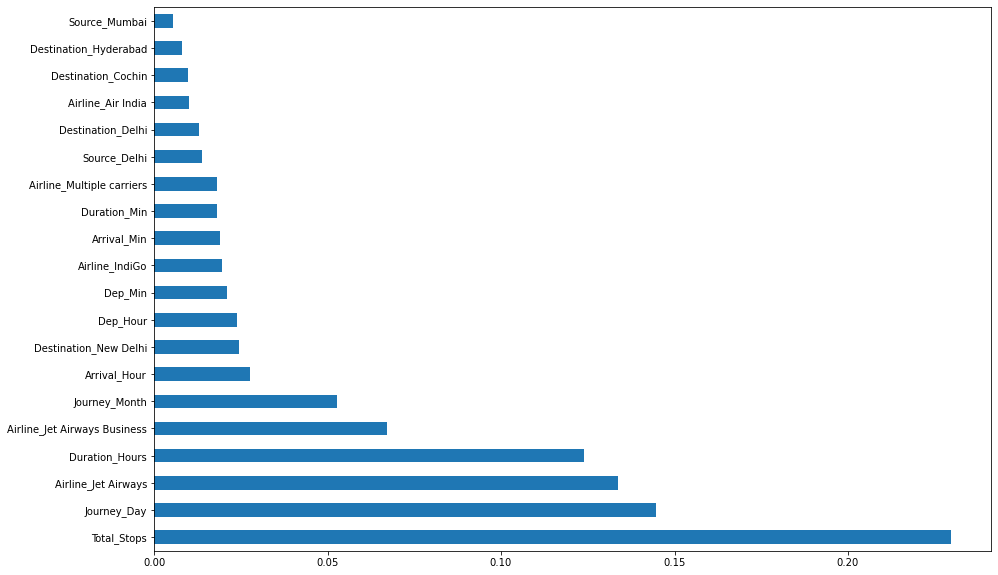

In [64]:
plt.figure(figsize=(15,10))
feaure_importances = pd.Series(selector.feature_importances_, index=X.columns)
feaure_importances.nlargest(20).plot.barh()


In [65]:
# As expected Label y is affected by [Total Stops,Duration of flight, Journey day, Month and respective companies ]

# Train Model
>* logistic regression
>* gb
>* Lasso


In [67]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_val, y_train, y_val = train_test_split(X,y , test_size=0.25, random_state=0)

In [69]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((8011, 29), (2671, 29), (8011,), (2671,))

>***Note*** --> RMSLE using for evaluation as it gives the percentage diff rather than  actual diff (more robust)

In [87]:
# def RMSLE(y_test, y_preds):
#     return np.sqrt(mean_squared_log_error(y_test, y_preds))

# def show_scores(model):
    
#     y_preds = model.predict(X_val)
#     train_preds = model.predict(X_train)
    
    
#     scores = {
        
#         "Training MAE" : mean_absolute_error(y_train, train_preds),
#         "Valid MAE" :  mean_absolute_error(y_val, y_preds),
            
#         "Training RMSLE" : RMSLE(y_train, train_preds),
#         "Valid RMSLE" : RMSLE(y_val, y_preds),
            
#         "Training R^2" : model.score(X_train, y_train),
#         "Valid R^2" : model.score(X_val, y_val)
#     }
    
#     return scores



def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_val, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_val, y_val)}
#     plot score
    sns.distplot(y_val-val_preds)
    plt.show()
    return scores

### Random Forest

In [88]:
rfr_model1 = RandomForestRegressor()
rfr_model1.fit(X_train, y_train)

RandomForestRegressor()

C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


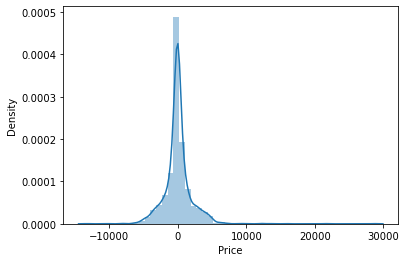

{'Training MAE': 551.7080663500116,
 'Valid MAE': 1204.906597637335,
 'Training RMSLE': 0.09640493864669918,
 'Valid RMSLE': 0.19076207581953264,
 'Training R^2': 0.9562018520827708,
 'Valid R^2': 0.8196921016977017}

In [89]:
show_scores(rfr_model1)

In [90]:
y.shape , X_train.shape

((10682,), (8011, 29))

### Gradient Boosting

In [91]:
gbr_model1 = GradientBoostingRegressor()


In [92]:
gbr_model1.fit(X_train, y_train)

GradientBoostingRegressor()

C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


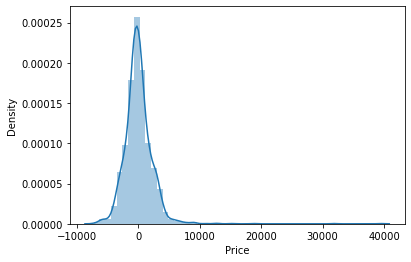

{'Training MAE': 1481.2437640797532,
 'Valid MAE': 1549.7454040765467,
 'Training RMSLE': 0.2135912344068248,
 'Valid RMSLE': 0.2196471684320461,
 'Training R^2': 0.7897595834834161,
 'Valid R^2': 0.7609707063463057}

In [93]:
show_scores(gbr_model1)

### Lasso

In [94]:
lss_model1 = Lasso()
lss_model1.fit(X_train,y_train)

Lasso()

C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


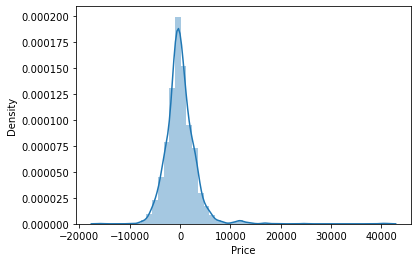

{'Training MAE': 1929.5527732454611,
 'Valid MAE': 2032.6715982700964,
 'Training RMSLE': 0.28478867204545505,
 'Valid RMSLE': 0.2941928626547844,
 'Training R^2': 0.6342054393527945,
 'Valid R^2': 0.5911954298571126}

In [95]:
show_scores(lss_model1)

### Hypertunning random forest beause has best score

In [96]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [97]:
rf_grid1 = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 1, 2, 5],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20,2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

In [98]:
rf_random = RandomizedSearchCV(RandomForestRegressor(),
                             param_distributions=rf_grid1,
                              n_iter=30,
                              cv=5,
                               n_jobs=1,
                               random_state=0,
                              verbose=False)

In [99]:
%%time
rf_random.fit(X_train, y_train)

CPU times: total: 37.2 s
Wall time: 37.4 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=30, n_jobs=1,
                   param_distributions={'max_depth': [None, 1, 2, 5],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=0, verbose=False)

In [100]:
rf_random.best_params_

{'n_estimators': 80,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': None}

C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


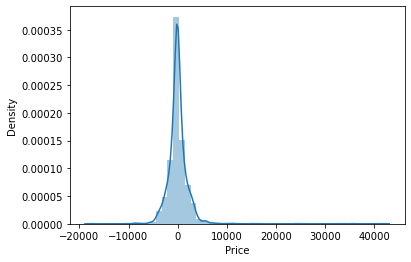

{'Training MAE': 918.5179405302508,
 'Valid MAE': 1230.1635417835316,
 'Training RMSLE': 0.14369620305996175,
 'Valid RMSLE': 0.18923874800887888,
 'Training R^2': 0.8722299150627115,
 'Valid R^2': 0.7715316435059794}

In [101]:
show_scores(rf_random)

In [102]:
## Lets try grid search

In [103]:
rf_grid2 = {"n_estimators": np.arange(50, 100, 10),
           "max_depth": [ None,1, 2],
           "min_samples_split": np.arange(2, 15, 2),
           "min_samples_leaf": np.arange(1, 10,2),
           "max_features": [1, "auto"]}

In [104]:
rf_grid_model = GridSearchCV(RandomForestRegressor(),
                            param_grid =rf_grid2,
                              cv=5,
                               n_jobs=1,
                              verbose=False)

In [105]:
%%time
rf_grid_model.fit(X_train, y_train)

CPU times: total: 24min 25s
Wall time: 25min 8s


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [None, 1, 2], 'max_features': [1, 'auto'],
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([50, 60, 70, 80, 90])},
             verbose=False)

In [106]:
rf_grid_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 90}

In [107]:
best_model = RandomForestRegressor( max_depth= None,
                                 max_features= 'auto',
                                 min_samples_leaf= 1,
                                 min_samples_split= 10,
                                 n_estimators= 90)

In [108]:
best_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=10, n_estimators=90)

C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


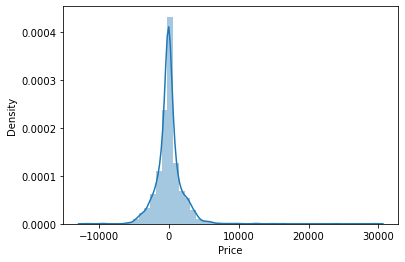

{'Training MAE': 802.456445040149,
 'Valid MAE': 1171.364002106238,
 'Training RMSLE': 0.12797199386839064,
 'Valid RMSLE': 0.18085133488524252,
 'Training R^2': 0.9175601037648785,
 'Valid R^2': 0.8341072485321609}

In [109]:
show_scores(best_model)

### Save and load model

In [118]:
import pickle

# file =  open('rf_model.pkl', 'wb')

# pickle.dump(best_model, file)

### Load

In [119]:
model =  open('rf_model.pkl', 'rb')

model = pickle.load(model)

In [120]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

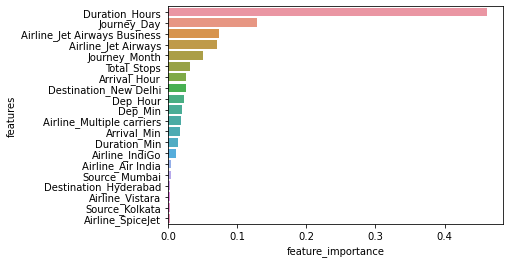

In [121]:
plot_features(X.columns, model.feature_importances_)